In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
# Define the environment: a simple maze represented by a grid
# 0: free space, 1: wall, 2: start point, 3: goal point
maze = np.array([
    [2, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 1, 0, 0, 3]
])

In [5]:
# Define possible actions
actions = ['up', 'down', 'left', 'right']

In [6]:
# Define rewards: reaching the goal gives +100, hitting a wall gives -10, every step -1
reward_matrix = np.zeros(maze.shape)
reward_matrix[maze == 1] = -10  # Penalty for walls
reward_matrix[maze == 3] = 100  # Reward for reaching the goal
reward_matrix[maze == 0] = -1   # Penalty for each step

In [7]:
# Q-table initialization (states: positions in the maze, actions: up, down, left, right)
q_table = np.zeros((*maze.shape, len(actions)))

In [8]:
# Parameters for Q-learning
alpha = 0.1   # Learning rate
gamma = 0.9   # Discount factor
epsilon = 1.0 # Starting exploration rate
min_epsilon = 0.01 # Minimum exploration rate
decay_rate = 0.995 # Decay rate for epsilon
episodes = 5000    # Increase episodes for better learning
max_steps = 100    # Max steps per episode

In [9]:
# Helper function to get the next position given an action
def get_next_position(current_position, action):
    row, col = current_position
    if action == 'up' and row > 0:
        row -= 1
    elif action == 'down' and row < maze.shape[0] - 1:
        row += 1
    elif action == 'left' and col > 0:
        col -= 1
    elif action == 'right' and col < maze.shape[1] - 1:
        col += 1
    # Return the next valid position
    if maze[row, col] == 1:  # If the new position is a wall, stay in the current position
        return current_position
    return (row, col)

In [10]:
# Q-learning algorithm
for episode in range(episodes):
    position = np.argwhere(maze == 2)[0]  # Start at the start point
    steps = 0

    for _ in range(max_steps):
        # Choose action (explore or exploit)
        if random.uniform(0, 1) < epsilon:
            action_idx = random.randint(0, len(actions) - 1)  # Explore
        else:
            action_idx = np.argmax(q_table[position[0], position[1]])  # Exploit

        action = actions[action_idx]
        new_position = get_next_position(position, action)

        # Get reward and update Q-table
        reward = reward_matrix[new_position[0], new_position[1]]
        old_value = q_table[position[0], position[1], action_idx]
        next_max = np.max(q_table[new_position[0], new_position[1]])

        # Q-learning update rule
        q_table[position[0], position[1], action_idx] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Move to the new position
        position = new_position

        steps += 1
        if maze[position[0], position[1]] == 3:  # Goal reached
            break

    # Decay epsilon (reduce exploration over time but maintain some exploration)
    epsilon = max(min_epsilon, epsilon * decay_rate)

In [11]:
# Find the optimal path from start to goal
optimal_path = []
position = np.argwhere(maze == 2)[0]  # Start point

while maze[position[0], position[1]] != 3:  # Until goal is reached
    optimal_path.append(tuple(position))
    best_action_idx = np.argmax(q_table[position[0], position[1]])
    action = actions[best_action_idx]
    position = get_next_position(position, action)
optimal_path.append(tuple(position))  # Append the goal position

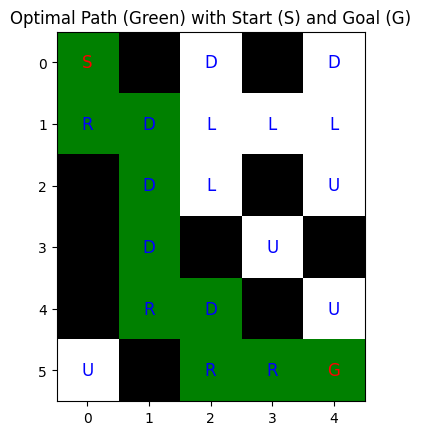

In [12]:
# Visualize the Q-learning results and highlight the optimal path
fig, ax = plt.subplots()

# Create a color map: white for free space, black for walls, green for the optimal path, red for start/goal
cmap = colors.ListedColormap(['white', 'black', 'green', 'red'])
bounds = [-1, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Prepare the maze with start and goal marked as 2 and 3
maze_map = np.copy(maze)
for pos in optimal_path:
    maze_map[pos] = 2 if maze[pos] == 2 else 2.5  # Use 2.5 for the path

ax.imshow(maze_map, cmap=cmap, norm=norm)

# Annotate directions on the grid
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        if maze[i, j] == 1:  # Wall
            continue
        if maze[i, j] == 2:  # Start
            ax.text(j, i, 'S', ha='center', va='center', color='red', fontsize=12)
        elif maze[i, j] == 3:  # Goal
            ax.text(j, i, 'G', ha='center', va='center', color='red', fontsize=12)
        else:
            best_action_idx = np.argmax(q_table[i, j])
            direction = actions[best_action_idx][0].upper()  # First letter of best action
            ax.text(j, i, direction, ha='center', va='center', color='blue', fontsize=12)

plt.title("Optimal Path (Green) with Start (S) and Goal (G)")
plt.show()
